# Runge-kutta for Lorenz96


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



### We define the Runge-kutta of 4th order

In [3]:
def RK4_step(f,t,y,h):
    k1 = h*f(t,y)
    k2 = h*f(t+0.5*h, y+0.5*k1)
    k3 = h*f(t+0.5*h, y+0.5*k2)
    k4 = h*f(t+h, y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

### Lorenz 96 model


In [4]:
def L96(t, v):
    """Lorenz 96 model with constant forcing"""
    # We define a tensor 
    dvdt = 0*v
    # iteraciona sobre los indices
    for i in range(N):
        dvdt[i] = (v[(i + 1)%N] - v[i - 2]) * v[i - 1] - v[i] + F
    return dvdt



In [5]:
%%time

N = 8 
F = 8 

t0=0
tn=5000 
h=0.005 

time = np.arange(t0, tn, h)


v = np.zeros([len(time),N], float)
v[0] +=F
v[0,0] += 0.5 


for i in range(len(time)-1):
    v[i+1] = RK4_step(L96,time[i],v[i],h)
v.shape

CPU times: user 37.2 s, sys: 943 ms, total: 38.2 s
Wall time: 38 s


(1000000, 8)

### We apply a standarization technique:

The scaling of variables is used so that supervised machine learning models, such as Deep Learning, do not have a tendency towards a specific range of values. Scaling the variables standardizes the characteristics of the values.

StandardScaler: This standardization technique is used to center feature columns with a mean of 0 and a standard deviation of 1, so that the feature columns have the same parameters as a standard normal distribution.

In [7]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(v)
print(data_scaler)
data_scaler.shape

df=pd.DataFrame(data_scaler)


[[ 1.66079289  1.53579261  1.55628674 ...  1.52602676  1.54128402
   1.5446019 ]
 [ 1.66011021  1.53556185  1.55080767 ...  1.52602814  1.54139132
   1.55006694]
 [ 1.65940412  1.53487443  1.54538568 ...  1.52603727  1.54170528
   1.55547717]
 ...
 [-0.90799826 -0.6718793   1.72132094 ...  0.27249354  1.12228114
  -0.89003855]
 [-0.88778197 -0.67263154  1.72027387 ...  0.30351199  1.10468591
  -0.91618468]
 [-0.8669159  -0.67250538  1.71921585 ...  0.33326984  1.08608271
  -0.94212463]]


### Let's plot the results 


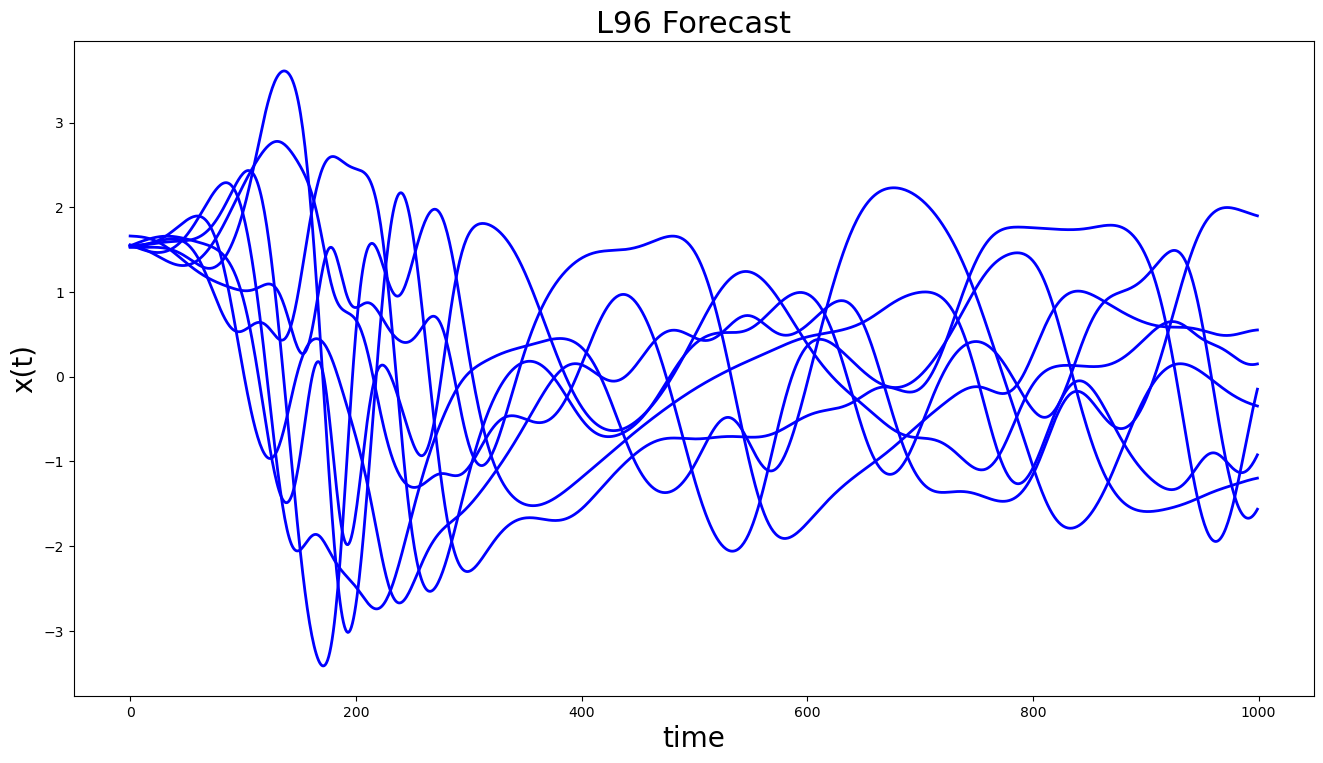

In [11]:
plt.figure (figsize = (16,8.5))
#for i in range(N):
plt.plot (data_scaler[:1000,:], linewidth = 2, color = 'b')
plt.title('L96 Forecast',fontsize=22)
plt.xlabel("time",fontsize=20)
plt.ylabel("x(t)",fontsize=20)
plt.show() 